# MUSIC RECOMMENDATION

### A) Problem Statement
The project aims to develop a music recommendation system that predicts what 
tracks a user might enjoy based on their past listening habits. This system will 
leverage the "song_data" dataset, which contains detailed information about 
various songs, to provide personalized music recommendations.

#### Objectives and Goals
1. **Data Preparation:** Clean and preprocess the "song_data" dataset for modeling.
2. **Exploratory Data Analysis (EDA):** Analyze data trends and correlations to inform model selection.
3. **Model Selection and Training:** Evaluate and train recommendation algorithms using the prepared dataset.
4. **Model Evaluation and Optimization:** Assess model performance and optimize algorithms for enhanced recommendation accuracy.
5. **Recommendation Generation:** Develop algorithms to generate personalized music recommendations based on user listening history.
6. **Deployment:** Implement the recommendation system and ensure scalability for real-world usage.


### B) Dataset Description
The Spotify song data CSV dataset contains comprehensive information about a wide range of songs available on the Spotify platform. It includes both numerical and categorical attributes, providing insights into various aspects of each track. Some of the key attributes in the dataset include acousticness, danceability, energy, duration, instrumentalness, valence, popularity, tempo, liveness, loudness, speechiness, year of release, key, artists, release date, track name, mode, and explicit content
This rich dataset serves as the foundation for developing a music recommendation system that predicts tracks users might enjoy based on their listening history.

In [ ]:
# IMPORTt NEEDED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np
from scipy import stats
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_71592\1258713072.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#IMPORT DATA FROM A CSV FILE INTO A DATAFRAME

In [2]:
df = pd.read_csv('song_data.csv')

### C) Exploratory Data Analysis

In [ ]:
# TAKE LOOK AT DATASET

In [3]:
print("The first 5 rows of the dataset are:")
df.head()

The first 5 rows of the dataset are:


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Unnamed: 19
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,NaN
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,NaN
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,NaN
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,NaN
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,NaN


In [ ]:
# QUICK DESCRIPTION OF THE DATA IN THE DATAFRAME

### View summary of dataset

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# Description:
The dataset contains 170,653 entries and 19 columns.
- The columns include both numerical (float64 and int64) and categorical (object) data types.
- Features such as 'valence', 'acousticness', 'danceability', 'energy', and others represent musical attributes on a scale from 0 to 1.
- There are no missing values in the dataset, as all columns have a non-null count of 170,653 entries.
- The 'release_date' column is stored as an object (string) data type, which may need to be converted to datetime for analysis

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
valence,170653.0,0.528587,0.263171,0.0,0.3170,0.540000,0.7470,1.000
year,170653.0,1976.787241,25.917853,1921.0,1956.0000,1977.000000,1999.0000,2020.000
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,170653.0,230948.310666,126118.414668,5108.0,169827.0000,207467.000000,262400.0000,5403500.000
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
explicit,170653.0,0.084575,0.278249,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
key,170653.0,5.199844,3.515094,0.0,2.0000,5.000000,8.0000,11.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000


### Drop irrelevant columns
 'id' is the unique identifier of each track in the dataset. We can drop this variable since it doesn't provide us with any useful information for the recommender system.

In [4]:
df.drop('id', axis=1, inplace=True)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

### D) Data preparation
 Before diving into analysis, it's crucial to ensure the dataset is clean and ready for processing.
 This involves identifying and addressing any inconsistencies, errors, or missing values in the data.
 In this section, we'll perform various data cleaning tasks, including:
 - Handling missing values
 - Removing duplicates
 - Correcting data types
 - Standardizing data formats
 Let's start by loading the dataset and examining its structure to identify areas that require cleaning.

#### Handle missing values

In [ ]:
# Detecting missing values numerically


In [45]:
df.isna()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Unnamed: 19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
170649,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
170650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
170651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [46]:
df.isna().any()

valence             False
year                False
acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                False
popularity          False
release_date        False
speechiness         False
tempo               False
Unnamed: 19          True
dtype: bool

This result indicates that all columns except 'Unnamed: 19' contain no missing values (False) in the dataset. We can drop 'Unnamed: 19'

In [5]:
df.drop('Unnamed: 19', axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

#### Remove duplicates 

In [6]:
# find duplicate rows in the entire dataset
duplicate_rows = df.duplicated()
# print duplicate rows
print(duplicate_rows)
# duplicates on entire dataset:
len(df)-len(df.drop_duplicates())

0         False
1         False
2         False
3         False
4         False
          ...  
170648    False
170649    False
170650    False
170651    False
170652    False
Length: 170653, dtype: bool


543

In [7]:
subsetAfterDropDuplicateValues = df.drop_duplicates()
subsetAfterDropDuplicateValues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170110 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170110 non-null  float64
 1   year              170110 non-null  int64  
 2   acousticness      170110 non-null  float64
 3   artists           170110 non-null  object 
 4   danceability      170110 non-null  float64
 5   duration_ms       170110 non-null  int64  
 6   energy            170110 non-null  float64
 7   explicit          170110 non-null  int64  
 8   instrumentalness  170110 non-null  float64
 9   key               170110 non-null  int64  
 10  liveness          170110 non-null  float64
 11  loudness          170110 non-null  float64
 12  mode              170110 non-null  int64  
 13  name              170110 non-null  object 
 14  popularity        170110 non-null  int64  
 15  release_date      170110 non-null  object 
 16  speechiness       170110 

In [8]:
subsetAfterDropDuplicateValues.to_csv('subsetAfterDropDuplicateValues.csv')

#### Detect outliers

In [9]:
# Calculate Z-scores for numerical features
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))

# Define threshold for Z-scores
threshold = 3  # Example threshold value

# Find indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove outliers from DataFrame
df_no_outliers = df.drop(outlier_indices[0])

# Print the shape of the DataFrame before and after removing outliers
print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)


Shape of DataFrame before removing outliers: (170653, 18)
Shape of DataFrame after removing outliers: (145847, 18)


# E) Data visualization

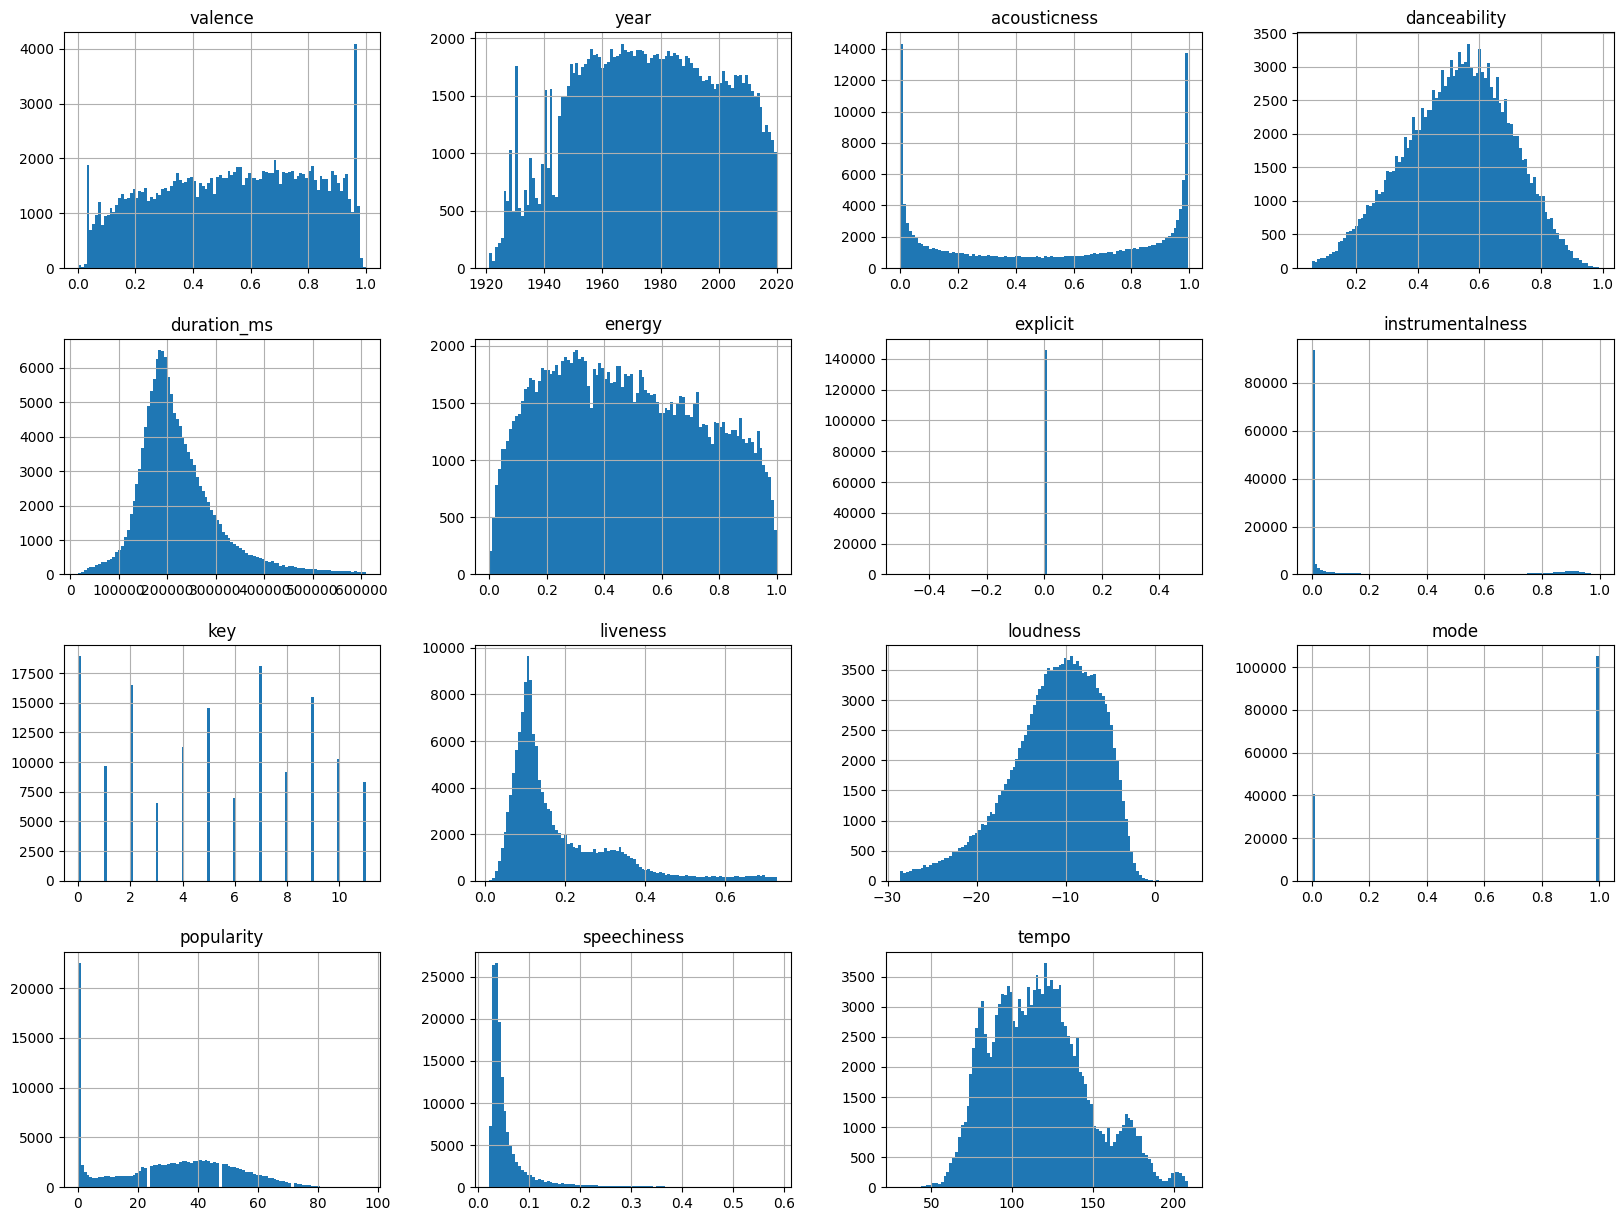

In [58]:
df_no_outliers.hist(bins = 100, figsize = (20,15))
plt.savefig("attribute_histogram_plots")

The above Visualization shows the variability of each metric in the dataset

# F) Model Training and Testing-Methodology
## Recommender System Methodology

### Content-Based Music Recommender System Using Cosine Similarity

#### Overview
This system suggests music tracks to users based on the features of tracks they have liked in the past, using a content-based filtering approach with cosine similarity.

#### Methodology

##### 1. **Data Preprocessing**
  1.1) Create a new DataFrame containing only these selected features.
  


In [10]:
columns_to_keep = ['year','name', 'artists','key']
df_cleaned = df_no_outliers[columns_to_keep]

In [11]:
df_cleaned.to_csv('df_cleaned.csv')

In [60]:
print(df_cleaned)


        year                         name  \
1       1921      Clancy Lowered the Boom   
2       1921                    Gati Bali   
3       1921                    Danny Boy   
4       1921  When Irish Eyes Are Smiling   
5       1921                 Gati Mardika   
...      ...                          ...   
170642  2020           Timeless Interlude   
170644  2020                     Sunblind   
170648  2020                        China   
170649  2020  Halloweenie III: Seven Days   
170650  2020                          AYA   

                                                  artists  key  
1                                          ['Dennis Day']    7  
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...    3  
3                                        ['Frank Parker']    5  
4                                          ['Phil Regan']    3  
5       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...    2  
...                                                   ...  ...  
1706

In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145847 entries, 1 to 170650
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   year     145847 non-null  int64 
 1   name     145847 non-null  object
 2   artists  145847 non-null  object
 3   key      145847 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.6+ MB


1.2) Sample 30,000 entries from this DataFrame for further analysis. 

In [12]:
sample_df = df_cleaned.sample(n=30000, random_state=42)
print(sample_df)

        year                                               name  \
119433  1993                                          This Time   
129910  1965    Good Morning, Little Schoolgirl - 2015 Remaster   
73249   2011                                         Bottoms Up   
10247   1973  Saturday Night’s Alright (For Fighting) - Rema...   
157768  1956                                 Artistry In Rhythm   
...      ...                                                ...   
126569  1949  Dido and Aeneas Z626 (ed. Geraint Jones) (2008...   
139586  2014                                     Nobody To Love   
12328   1983                                     Club Tropicana   
21952   1936                       Arroja la Bomba - Remastered   
97723   1965               Look What You've Done - Mono Version   

                                                  artists  key  
119433                                  ['Dwight Yoakam']    9  
129910                                  ['The Yardbirds']    4  


In [13]:
sample_df.to_csv('sample_df.csv')

In [63]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 119433 to 97723
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     30000 non-null  int64 
 1   name     30000 non-null  object
 2   artists  30000 non-null  object
 3   key      30000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


##### 2. **Feature Extraction**
  2.1)   Select relevant features: name, Year, Key, and Artists.


In [ ]:
features = ['key','year','artists','name']

2.2) Concatenate the 'artists', 'year', 'key', and 'name' columns of a DataFrame row into a single string.

In [64]:
def combine_features(row):
    return (
        row['artists'] + " " +
        str(row['year']) + " " +
        str(row['key']) + " " +
        str(row['name']) 
    )

2.3) Add a new column 'combine_features' to sample_df by applying the combine_features function to each row.

In [66]:
sample_df['combine_features'] = sample_df.apply(lambda row: combine_features(row), axis=1)
sample_df["combine_features"].head(5)

119433                   ['Dwight Yoakam'] 1993 9 This Time
129910    ['The Yardbirds'] 1965 4 Good Morning, Little ...
73249                      ['Nickelback'] 2011 0 Bottoms Up
10247     ['Elton John'] 1973 0 Saturday Night’s Alright...
157768            ['Stan Kenton'] 1956 8 Artistry In Rhythm
Name: combine_features, dtype: object

2.4) Transform the 'combine_features' column of sample_df into a count matrix, and stores the result in count_matrix

In [67]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(sample_df["combine_features"])

##### 3. **Cosine Similarity Calculation**
Compute the cosine similarity between the rows of the count_matrix and stores the resulting similarity matrix in cosine_sim.

In [68]:
cosine_sim = cosine_similarity(count_matrix)

In [69]:
print(cosine_sim.shape)

(30000, 30000)


In [ ]:
df_cleaned['index'] = range(len(df_cleaned))

In [71]:
df_cleaned.head(5)

,year,name,artists,key,index
1,1921,Clancy Lowered the Boom,['Dennis Day'],7,0
2,1921,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,3,1
3,1921,Danny Boy,['Frank Parker'],5,2
4,1921,When Irish Eyes Are Smiling,['Phil Regan'],3,3
5,1921,Gati Mardika,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,2,4


#### 4. **Generate Recommendations**
4.1) Define two helper functions to get the movie title from the movie index and vice-versa.

In [72]:
def get_name_from_index(index):
    return df_cleaned[df_cleaned.index == index]["name"].values[0]

def get_index_from_name(name):
    return df_cleaned[df_cleaned.name == name]["index"].values[0]

Our next step is to get the name of the song that the user currently likes. Then, we will find the
index of that song in df. After that, we will access the row corresponding to this song in the
similarity matrix. Thus, we will get the similarity scores of all other song from the current
song. Then, we will enumerate through all the similarity scores of that song to make a tuple of
song index and similarity score. This will convert a row of similarity scores like this: [1 0.5 0.2
0.9] to this: [(0, 1) (1, 0.5) (2, 0.2) (3, 0.9)]. Here, each item is in this form: (song index,
similarity score).
The function get_name_from_index(index) takes the index of the song as argument, then,
returns the name value of that song in the dataframe using the property values.
The function get_index_from_name(name) takes the name of the song as argument, then, returns
the index value of that song in the dataframe using the property values.

In [ ]:
# Test the function get_index_from_name(name) with a song named “Gati Bali”.

In [73]:
song_user_likes = "Gati Bali"
song_index = get_index_from_name(song_user_likes)
print(song_index)

1


Access the row corresponding to the given song to find all the similarity scores for that song
and then enumerate over it. You can use the list function which creates a collection that can be
manipulated for your analysis. This collection of data is called a list object. When you
use enumerate, the function gives you back two loop variables:
- The count of the current iteration
- The value of the item at the current iteration

In [74]:
similar_songs = list(enumerate(cosine_sim[song_index]))

Sort the list similar_songs according to similarity scores in descending order. The function
sorted is used to sort the elements similar_songs with respect to the element at index 1 (second
element – similarity score). The sorted function returns a sorted list of the specified object. You
can specify ascending or descending order. Strings are sorted alphabetically, and numbers are
sorted numerically. Since the most similar song to a given song will be itself, we will discard the
first element after sorting the songs.

In [ ]:
sorted_similar_songs = sorted(similar_songs, key=lambda x:x[1],reverse=True)[1:]
# The key argument is meant to specify how to perform the sort.
# The reverse keyword is optional, It is a Boolean value, False will sort ascending, True will sort descending.

Run a loop to print first 5 entries from the sorted_similar_songs list.

In [75]:
i=0
print("Top 5 similar songs to "+song_user_likes+" are:\n")
for element in sorted_similar_songs:
    print(get_name_from_index(element[0]))
    i=i+1
    if i>4:
        break

Top 5 similar songs to Gati Bali are:

Oh! You Pretty Things - 2015 Remaster
Rock And Roll All Nite
Mi Perdón - Remasterizado
Heebie Jeebies
Josephine


# G) Conclusion and Future Work
## Conclusion
This project successfully developed a content-based music recommender system using cosine similarity. The system utilizes track features to recommend songs that are similar to those a user has liked in the past. Key steps included data preprocessing, feature selection, similarity computation, and generating recommendations.

Key findings and outcomes:
- **Effective Feature Selection**: By selecting relevant features such as Acousticness, Danceability, Energy, and others, the system can accurately represent the characteristics of each track.

- **Scalability**: The approach can handle large datasets efficiently, demonstrated by sampling 30,000 tracks for analysis.
    
## Future Work
While the current system provides accurate recommendations based on track features, there are several potential enhancements and areas for further research:

1. **User Interaction Data**: Incorporating user interaction data (e.g., user ratings, play counts) could improve recommendation accuracy by combining content-based and collaborative filtering methods.
2. **Advanced Similarity Measures**: Exploring advanced similarity measures such as Pearson correlation  could enhance the system's performance.
3. **Real-Time Recommendations**: Implementing real-time recommendation updates as users interact with the system would provide a more dynamic and personalized experience.
4. **Extended Feature Set**: Adding more features, such as lyrics analysis, genre classification, and mood detection, could provide deeper insights into track characteristics.

By implementing these enhancements, the music recommender system can become more robust, accurate, and user-centric, providing a richer and more satisfying experience for users.

